# Hartmann6

Consider the Hartmann6 function
 \begin{equation}
 \label{eq:model}
f(x)=-\sum_{i=1}^{4} \alpha_i exp\{-\sum_{j=1}^{d}A_{i,j} (x_j - P_{i,j})^2\}
\end{equation}
where $x \in \mathfrak{X}=[0, 1]^d$.

The gradient of the Hartmann6 function is

\begin{equation}
\nabla f(x_k)= \sum_{i=1}^{4} 2 \alpha_i A_{i,k} (x_k - P_{i,k}) exp\{-\sum_{j=1}^{d}A_{i,j} (x_j - P_{i,j})^2\},
\end{equation}
where,

$$
A = \begin{pmatrix}
    10 & 3& 17& 3.5& 1.7& 8 \\
    0.05& 10& 17& 0.1& 8& 14 \\
    3& 3.5& 1.7& 10& 17& 8 \\
    17& 8& 0.05& 10& 0.1& 14 \\
    \end{pmatrix},
$$

$$
P =\begin{pmatrix}
    0.1312& 0.1696& 0.5569& 0.0124& 0.8283& 0.5886 \\
    0.2329& 0.4135& 0.8307& 0.3736& 0.1004& 0.9991 \\
    0.2348& 0.1451& 0.3522& 0.2883& 0.3047& 0.6650 \\
    0.4047& 0.8828& 0.8732& 0.5743& 0.1091& 0.0381 \\
    \end{pmatrix},
$$
and

$$
\alpha = \begin{pmatrix}
        1 & 1.2& 3& 3.2 \\
       \end{pmatrix} 
$$.

# Import libraries

In [1]:
import numpy as np 
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import textwrap

import metod_alg as mt
from metod_alg import metod_algorithm_functions as mt_alg
from metod_alg import objective_functions as mt_obj
import tqdm
import seaborn as sns
import SALib
from SALib.sample import sobol_sequence

# Results

For all results $d=6$ and $N=100$.

In [48]:
d = 6
beta_list = [0.01,0.001]
m_list = [1,2]
global_minimum = -3.32237
avg_grad = np.zeros((len(m_list) * len(beta_list), 100, 100))

total_no_local_minimizers_metod = np.zeros((len(m_list), len(beta_list), 100))
time_taken_metod = np.zeros((len(m_list), len(beta_list), 100))
extra_descents_metod = np.zeros((len(m_list), len(beta_list), 100))
func_val_metod = np.zeros((len(m_list), len(beta_list), 100))

df_mult = pd.read_csv('hart_sd_metod_beta_0.1_m=1_d=6_random_100.csv')
total_no_local_minimizers_mult = np.array(df_mult['number_minimizers_per_func_multistart'])
time_taken_mult = np.array(df_mult['time_multistart'])
func_val_mult = np.array(df_mult['min_func_val_multistart'])
test = np.array(df_mult['number_minimizers_per_func_metod'])

index_all = 0
index_m = 0
for m in m_list:
    index_beta = 0
    for beta in beta_list:
        df_metod = pd.read_csv('hart_metod_beta_%s_m=%s_d=6_random_100.csv'% (beta, m))
        total_no_local_minimizers_metod[index_m, index_beta] = np.array(df_metod['number_minimizers_per_func_metod'])
        time_taken_metod[index_m, index_beta] = np.array(df_metod['time_metod'])
        func_val_metod[index_m, index_beta] = np.array(df_metod['min_func_val_metod'])
        if beta == 0.1 and m == 1:
            assert(np.all(total_no_local_minimizers_metod[index_m, index_beta] == test))
        extra_descents_metod[index_m, index_beta] = np.array(df_metod['number_extra_descents_per_func_metod'])

        avg_grad[index_all] = np.genfromtxt('hart_grad_norm_beta_%s_m=%s_d=6_random_100.csv'% (beta, m), delimiter=',')
        index_beta += 1
        index_all += 1
    index_m += 1

In [49]:
total_no_local_minimizers_mult

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [50]:
test

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [51]:
np.array(df_mult['time_metod'])

array([37.42314005, 38.10973358, 27.07084346, 26.62843227, 30.0840621 ,
       28.21445179, 23.08056068, 33.28243399, 33.62127042, 24.95651507,
       22.90669608, 38.56574535, 29.18860602, 27.02691841, 38.79868412,
       29.63931394, 34.70140004, 25.29933667, 26.50005484, 34.18185425,
       36.4055419 , 28.8433547 , 25.57426977, 28.41222644, 28.88784027,
       32.67546391, 31.82147384, 29.45811009, 24.33644295, 27.77498746,
       32.4425652 , 31.08221006, 29.85657549, 26.52108335, 21.09369469,
       27.73148894, 25.70951819, 26.70415878, 20.20549846, 26.07914805,
       29.11534238, 31.53433585, 33.73511505, 28.15486646, 26.01859045,
       37.12625003, 38.91681767, 28.76719785, 36.5329833 , 26.76179576,
       29.61192441, 36.61404324, 31.73597765, 30.28671312, 26.67535186,
       30.35806298, 38.12972617, 24.02150011, 27.85458469, 38.0950191 ,
       40.59313369, 28.25400472, 31.2165215 , 28.79552555, 32.43719482,
       29.83263016, 36.06813717, 36.05934596, 28.60847712, 28.70

In [52]:
time_taken_mult

array([28.03131771, 38.22884512, 27.29306507, 27.93623281, 30.50109768,
       30.89517546, 22.22799897, 31.64665389, 33.12525535, 25.55865765,
       24.17431355, 38.04376769, 29.70468926, 26.71001935, 39.46516228,
       31.20865202, 34.18480659, 25.48930979, 25.36138654, 32.28583789,
       34.54810023, 27.4566474 , 27.32772136, 29.31116056, 28.3155551 ,
       30.63929367, 33.9606576 , 30.80729866, 25.51175952, 26.40826106,
       30.33509994, 31.04504323, 28.70958042, 26.55908728, 21.61035943,
       27.20565963, 25.27690077, 27.85847783, 19.34122539, 25.23344254,
       27.79305649, 32.06612492, 32.93769765, 27.35898829, 24.79105783,
       34.9714303 , 36.66337371, 27.52837801, 34.7209549 , 26.57968283,
       29.24718308, 33.68482327, 30.45282674, 30.27846146, 27.43512964,
       30.65443897, 36.42210889, 26.09285927, 28.98499274, 35.42457318,
       38.29719067, 28.7354629 , 31.03674006, 29.18664837, 30.85075831,
       30.97137022, 34.98510623, 37.25173783, 28.23884463, 28.62

In [53]:
total_no_minimizers_prop = total_no_local_minimizers_metod / total_no_local_minimizers_mult

In [54]:
time_taken_prop = time_taken_metod / time_taken_mult

In [55]:
for j in range(len(beta_list) * len(m_list)):
    for k in range(j+1, len(beta_list) * len(m_list)):
            assert(np.all(np.round(avg_grad[k], 5) == np.round(avg_grad[j], 5)))

In [56]:
same_global_min = np.zeros((len(m_list), len(beta_list)))
same_minimizer = np.zeros((len(m_list), len(beta_list)))
mean_excessive_descents = np.zeros((len(m_list), len(beta_list)))
for i in range(len(m_list)):
    for j in range(len(beta_list)):
        assert(np.all(total_no_local_minimizers_mult >=  total_no_local_minimizers_metod[i, j]))
        same_global_min[i, j] = np.where(np.round(func_val_mult, 2) == np.round(func_val_metod[i, j], 2))[0].shape[0]
        same_minimizer[i, j] = np.sum(total_no_local_minimizers_metod[i, j]) / np.sum(total_no_local_minimizers_mult)
        mean_excessive_descents[i, j] = np.mean(extra_descents_metod[i, j])

In [57]:
same_global_min

array([[100., 100.],
       [100., 100.]])

In [58]:
same_minimizer

array([[1., 1.],
       [1., 1.]])

In [59]:
number_its = np.genfromtxt('hart_no_its_mult_beta_0.1_m=1_d=6_random_100.csv', delimiter=',')
store_mean_its = np.zeros((100))
store_min_its = np.zeros((100))
store_mean_norm_grad = np.zeros((100))
for j in range(100):
    store_mean_its[j] = np.mean(number_its[j])
    store_min_its[j] = np.min(number_its[j])
    store_mean_norm_grad[j] = 1 / np.mean(avg_grad[0][j])

In [60]:
store_mean_its

array([141.2 , 181.64, 134.56, 142.76, 155.22, 157.41, 112.85, 155.59,
       163.19, 126.15, 119.77, 189.28, 146.96, 131.11, 195.95, 154.49,
       169.91, 125.91, 125.87, 160.14, 171.53, 138.12, 135.83, 143.05,
       143.19, 154.15, 157.28, 149.31, 122.81, 134.93, 155.97, 157.97,
       146.87, 130.7 , 105.45, 134.67, 125.55, 142.36,  98.61, 128.28,
       142.2 , 157.25, 162.13, 134.1 , 122.43, 173.11, 181.9 , 135.88,
       172.74, 131.64, 141.24, 165.05, 148.65, 148.71, 136.08, 152.63,
       179.82, 127.86, 143.51, 178.65, 195.67, 145.06, 159.67, 149.5 ,
       157.66, 152.75, 178.93, 190.44, 143.03, 146.49, 133.3 , 132.54,
       175.82, 126.96, 132.34, 124.47, 163.43, 130.73, 116.04, 163.49,
       136.15, 152.09, 144.94, 131.66, 174.76, 123.23, 125.6 , 129.19,
       138.17, 145.75, 182.78, 148.86, 140.02, 187.71, 169.34, 155.25,
       148.05, 205.67, 146.08, 120.37])

In [61]:
store_min_its

array([13., 12., 14., 13., 13., 13., 11., 12., 13., 12., 13.,  7., 13.,
       13., 10., 13., 12., 13., 12., 11., 12., 13., 14., 13., 13., 13.,
       14., 12., 12., 12., 13.,  6., 12., 14., 12., 13., 14., 12., 13.,
       11., 13., 14., 13., 10.,  9., 14., 14., 12., 13., 10., 12., 13.,
       12., 11., 14., 12., 14., 12., 13., 13., 12., 11., 13., 13., 13.,
       12., 13., 12.,  9., 14., 13., 12., 14., 13., 13., 13., 13., 12.,
       12., 12., 12., 10., 14., 12., 12., 11., 12., 14., 14., 12., 14.,
       13., 13., 10., 11., 13., 13., 11., 12., 13.])

In [62]:
store_mean_norm_grad

array([0.51376896, 0.62229737, 0.46130579, 0.54080867, 0.68071498,
       0.57731177, 0.4933436 , 0.5654988 , 0.5441465 , 0.52829221,
       0.55302931, 0.53183284, 0.46037296, 0.56503077, 0.52431994,
       0.59399038, 0.64116208, 0.5434571 , 0.44642663, 0.56085383,
       0.48663086, 0.67857009, 0.4798454 , 0.63155927, 0.49025835,
       0.56124637, 0.53687792, 0.54962397, 0.50258369, 0.57824014,
       0.5858458 , 0.46237913, 0.63848897, 0.62254311, 0.52519374,
       0.5756735 , 0.6516985 , 0.44508049, 0.61295605, 0.57875271,
       0.52368693, 0.45128617, 0.53052527, 0.49433924, 0.51321613,
       0.50904836, 0.59433082, 0.556454  , 0.55234405, 0.55395134,
       0.51105287, 0.56285129, 0.49877392, 0.48249513, 0.48416132,
       0.59406984, 0.65752914, 0.50312985, 0.61019105, 0.66543098,
       0.47192441, 0.54534307, 0.52122217, 0.49007356, 0.48474748,
       0.66900849, 0.43306192, 0.54502292, 0.56672364, 0.5037154 ,
       0.51811824, 0.59903187, 0.70458154, 0.54082842, 0.45397

In [63]:
def set_box_color(bp, color):
    """Set colour for boxplot."""
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
def create_boxplots_ratio(arr1, arr2, labels, ticks):
    plt.figure(figsize=(7, 5))
    
    max_num = max(np.max(arr1), np.max(arr2))
    plt.ylim(0, max_num + 0.1)
    bpl = plt.boxplot(arr1.T,
                      positions=np.array(range(len(arr1)))*2.0-0.4)
    bpr = plt.boxplot(arr2.T,
                      positions=np.array(range(len(arr2)))*2.0+0.4)
    set_box_color(bpl, 'green')
    set_box_color(bpr, 'navy')
    plt.plot([], c='green', label=labels[0])
    plt.plot([], c='navy', label=labels[1])
    plt.legend(bbox_to_anchor=(0.99, 1.025), loc='upper left',
               prop={'size': 15})
    plt.xlabel(r'$\beta$', size=14)
    plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks, size=15)
    plt.yticks(fontsize=14)
    plt.tight_layout()

# Total number of local minima

In [65]:
ticks = []
labels = []
for beta in beta_list:
    ticks.append(beta)
for m in m_list:
    labels.append(r'$M =$ %s' % (m))

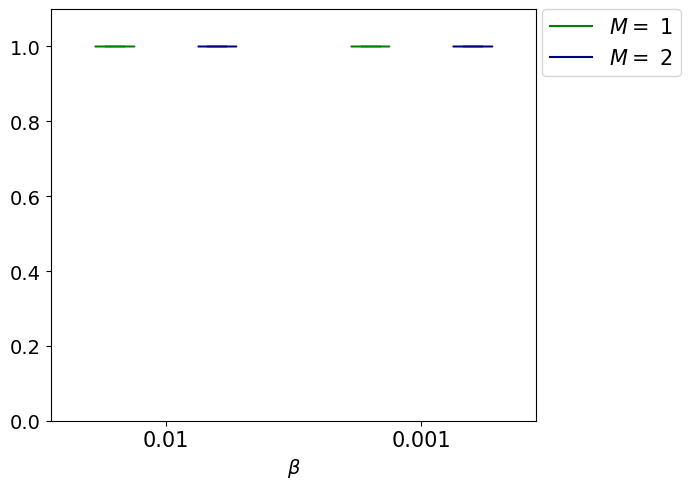

In [66]:
create_boxplots_ratio(total_no_minimizers_prop[0], total_no_minimizers_prop[1], labels, ticks)

# Efficiency

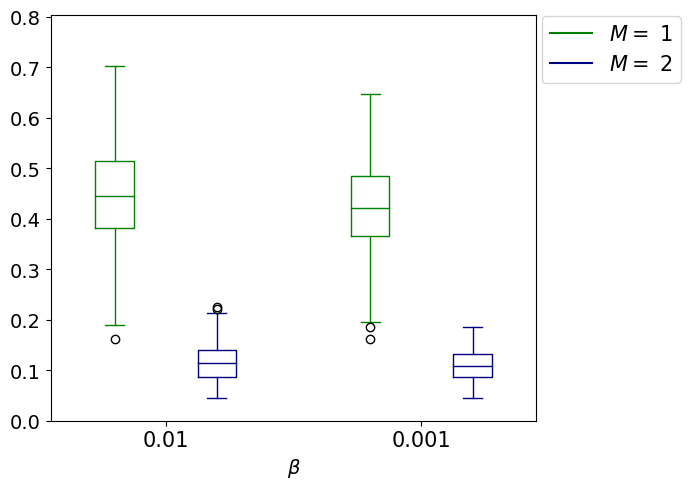

In [67]:
create_boxplots_ratio(time_taken_prop[0], time_taken_prop[1], labels, ticks)

# Excessive descents

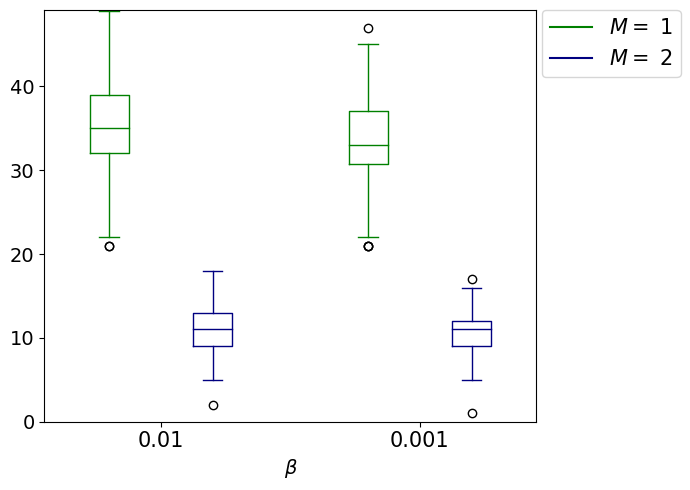

In [68]:
create_boxplots_ratio(extra_descents_metod[0], extra_descents_metod[1], labels, ticks)